# Análise Exploratória de Dados de Vendas em 2023

## Introdução
- Objetivo do trabalho: Analisar as vendas de 2023 para identificar padrões e insights que possam orientar decisões estratégicas.
- Descrição dos dados: Dados de vendas simulados para o ano de 2023, incluindo informações sobre produtos, categorias, quantidades e preços.


## 1. Limpeza e Preparação dos Dados
- Importação dos dados: Carregamento dos dados e bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Definindo os parâmetros
num_dados = 500
data_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E', 'Produto F']
categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3']

# Gerando os dados
np.random.seed(2)  # Para reprodutibilidade
random.seed(2)

dados = []

for i in range(num_dados):
    data = random.choice(data_range)
    quantidade = random.randint(1, 20)
    categoria = random.choice(categorias)
    preco = round(random.uniform(10.0, 100.0), 2)

    # Aumentar as vendas em novembro e dezembro
    if data.month in [11, 12]:
        quantidade *= 2  # Dobrar a quantidade, pois na Black Friday e Natal as vendas aumentam
    
    # Fazer com que cada produto pertença a uma categoria específica,ou seja o mesmo produto não pode estar em categorias diferentes. Pois imagino que cada produto pertença a uma categoria específica, por exemplo, um produto de limpeza não pode estar na categoria de alimentos.
    if categoria == categorias[0]:
        produto =  random.choice(produtos[:2])
    elif categoria == categorias[1]:
        produto =  random.choice(produtos[2:4])
    else:
        produto =  random.choice(produtos[4:])
        
    dados.append([i, data, produto, categoria, quantidade, preco])

# Cria o DataFrame
df = pd.DataFrame(dados, columns=['ID', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preço'])


#### Adicionando valores faltantes para poder exemplificar a limpeza

In [3]:
df.loc[5, 'Produto'] = np.nan
df.loc[10, 'Quantidade'] = np.nan
df.loc[15, 'Preço'] = np.nan
df.loc[20, 'Categoria'] = np.nan
df.loc[25, 'Data'] = np.nan

#quantidade de dados nulos
df.isnull().sum()

ID            0
Data          1
Produto       1
Categoria     1
Quantidade    1
Preço         1
dtype: int64

#### Tratamento de valores faltantes: Substituição de valores nulos por medidas apropriadas.

In [4]:
# Remover linhas onde Produto ou Data são nulos
df = df.dropna(subset=['Produto', 'Data'])

# Preencher valores faltantes em Quantidade com a média
df['Quantidade'] = df['Quantidade'].fillna(df['Quantidade'].mean())

# Preencher valores faltantes em Preço com a média
df['Preço'] = df['Preço'].fillna(df['Preço'].mean())

# Preencher valores faltantes em Categoria com Não informado
df['Categoria'] = df['Categoria'].fillna('Não informado')

# Remoção de duplicatas
df = df.drop_duplicates()

#quantidade de dados nulos
df.isnull().sum()

ID            0
Data          0
Produto       0
Categoria     0
Quantidade    0
Preço         0
dtype: int64

#### conversão de tipos

In [5]:
df['ID'] = df['ID'].astype(int)
df['Quantidade'] = df['Quantidade'].astype(int)
df['Preço'] = df['Preço'].astype(float)
df['Categoria'] = df['Categoria'].astype('category')

# Salvando o dataframe limpo em um arquivo csv
df.to_csv('data_clean.csv', index=False)

#mostra o dataframe limpo
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,0,2023-01-29,Produto A,Categoria 1,3,42.50
1,1,2023-12-09,Produto C,Categoria 2,20,64.53
2,2,2023-10-25,Produto D,Categoria 2,6,67.46
3,3,2023-10-06,Produto E,Categoria 3,15,34.14
4,4,2023-01-15,Produto D,Categoria 2,12,93.87


## 2. Análise Descritiva
- Estatísticas descritivas: Resumo das estatísticas principais dos dados.
- Distribuições de vendas por mês: Análise das vendas mensais.

In [6]:
# Estatísticas descritivas
estatisticas_descritivas = df.describe()
print(estatisticas_descritivas)

               ID                           Data  Quantidade       Preço
count  498.000000                            498  498.000000  498.000000
mean   250.441767  2023-07-06 17:26:44.819277056   12.755020   53.017646
min      0.000000            2023-01-01 00:00:00    1.000000   10.140000
25%    126.250000            2023-04-04 00:00:00    6.000000   31.932500
50%    250.500000            2023-07-04 12:00:00   12.000000   51.095000
75%    374.750000            2023-10-13 00:00:00   18.000000   73.730000
max    499.000000            2023-12-31 00:00:00   40.000000   99.880000
std    144.001473                            NaN    8.450842   25.315847


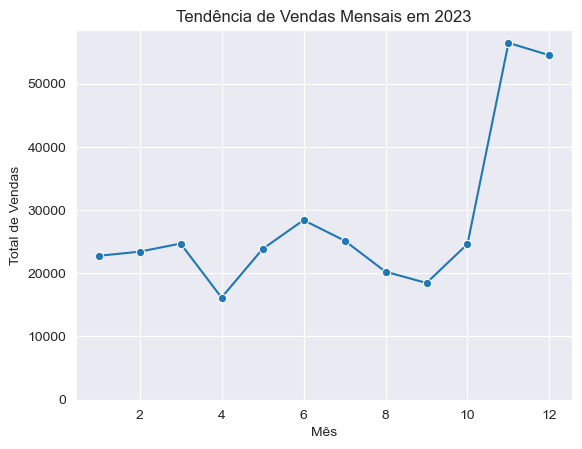

In [7]:
# Adicionando colunas para ano e mês
df['Mes'] = df['Data'].dt.month

#total de vendas por produto
df['Total_vendas'] = df['Quantidade'] * df['Preço']

# Total de vendas por mês
vendas_mes = df.groupby('Mes')['Total_vendas'].sum().reset_index()

# Gráfico de linhas mostrando a tendência de vendas ao longo do tempo
sns.lineplot(data=vendas_mes, x='Mes', y='Total_vendas', marker='o')
plt.title('Tendência de Vendas Mensais em 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.ylim(0) # Garantir que o eixo y comece em 0, pois pode distorcer a visualização
plt.grid(True) # Adicionar grade para facilitar a leitura
plt.show()

## Análise de Categorias de Produtos
- Vendas por categoria: Identificação das categorias mais vendidas.
- Produtos mais vendidos: Listagem dos produtos mais populares.

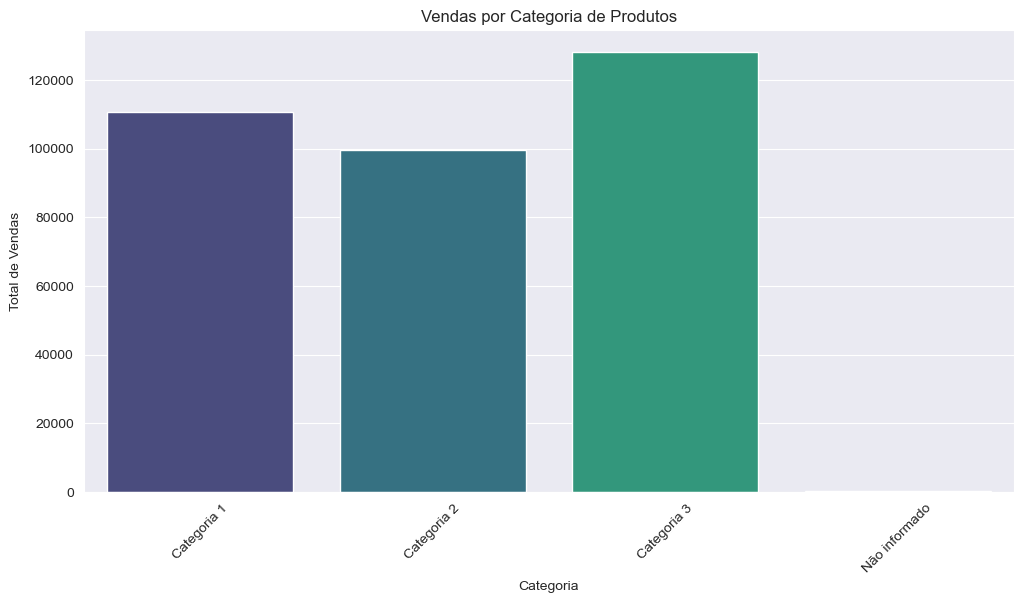

In [8]:
# Agrupando as vendas por categoria
vendas_categoria = df.groupby('Categoria', observed=False)['Total_vendas'].sum().reset_index()

# Ordenando as categorias pelo total de vendas
vendas_categoria = vendas_categoria.sort_values(by='Total_vendas', ascending=False)

# Plotando as vendas por categoria com ajustes no palette
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_categoria, x='Categoria', y='Total_vendas', hue='Categoria', palette='viridis', legend=False)
plt.title('Vendas por Categoria de Produtos')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


In [9]:
#agrupamento por produto, somando as vendas e ordenando pela maior venda para localizar o produto com maior e menor venda
tot_vendas_prod = df.groupby('Produto')['Total_vendas'].sum().sort_values(ascending=False)

#produto com maior venda
prod_mais_vendido = tot_vendas_prod.index[0]
qtd_maior_venda = tot_vendas_prod.iloc[0]

print(f"O produto mais vendido foi o {prod_mais_vendido}, com um total de vendas de R${qtd_maior_venda:.2f}")

O produto mais vendido foi o Produto E, com um total de vendas de R$66998.40


### padrões e insights

In [10]:
# ordenando os dados para identificar o mês de maior e menor vendas
vendas_mes = vendas_mes.sort_values('Total_vendas',ascending = False)

# mes de menos venda
mes_menor_venda = vendas_mes['Mes'].iloc[-1]
tot_vendas_menor_mes = vendas_mes['Total_vendas'].iloc[-1]
# mes de mais venda
mes_maio_venda = vendas_mes['Mes'].iloc[0]
tot_vendas_maior_mes = vendas_mes['Total_vendas'].iloc[0]

print(f"O mês com menor volume de vendas foi o mês {mes_menor_venda}, com um total de vendas de R${tot_vendas_menor_mes:.2f}")
print(f"O mês com maior volume de vendas foi o mês {mes_maio_venda}, com um total de vendas de R${tot_vendas_maior_mes:.2f}")

O mês com menor volume de vendas foi o mês 4, com um total de vendas de R$16155.82
O mês com maior volume de vendas foi o mês 11, com um total de vendas de R$56441.68


## Insights e Padrões Observados



##### Insight 1: Mês com o Maior Número de Vendas
- **Mês:** Novembro
- **Total de Vendas:** R$56441.68

**Análise:**
- O aumento das vendas em novembro sugere que as campanhas de marketing, como a Black Friday, são extremamente eficazes. Além disso, as festas de fim de ano aumentam o consumo dos produtos de categoria 3, o que indica que a empresa deve focar em estratégias específicas para esses períodos e produtos.
---
##### Insight 2: Mês com o Menor Número de Vendas
- **Mês:** Abril
- **Total de Vendas:** R$16155.82

**Análise:**
- A queda das vendas em abril pode ser um indicador de sazonalidade negativa. Investir em promoções específicas para essa época ou introduzir novos produtos sazonais pode ajudar a aumentar as vendas nesse período.